<ipython-input-5-3322568b8579>:42: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(time, spike_train, use_line_collection=True)


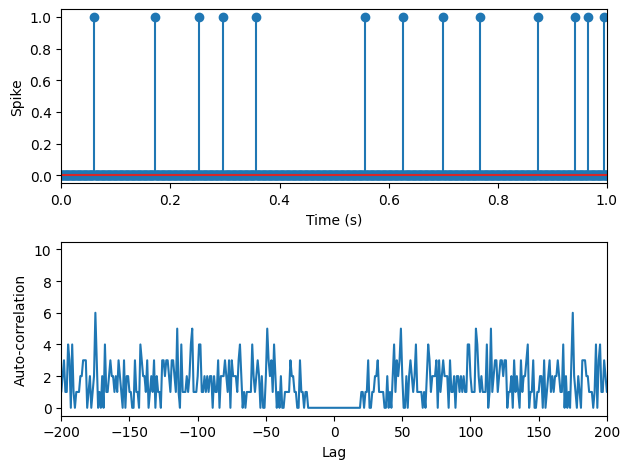

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def poisson_spike_train(rate, duration, refractory_period):
    num_bins = int(duration * 1000)
    spike_train = np.zeros(num_bins)
    
    time = 0
    while time < duration:
        isi = np.random.exponential(scale=1.0/rate)
        if isi > refractory_period:
            bin_idx = int(time * 1000)
            if bin_idx < num_bins:
                spike_train[bin_idx] = 1
            time += isi
        else:
            time += refractory_period
    
    return spike_train

# Parameters
rate = 50  # Number of spikes per second
duration = 10  # Duration of the spike train in seconds
refractory_period = 0.02  # Refractory period in seconds

# Generate spike train
spike_train = poisson_spike_train(rate, duration, refractory_period)

# Perform auto-correlation
auto_corr = np.correlate(spike_train, spike_train, mode='full')
lags = np.arange(-len(spike_train)+1, len(spike_train))

# Remove lag at point 0
zero_index = len(spike_train) - 1
auto_corr = np.delete(auto_corr, zero_index)
lags = np.delete(lags, zero_index)

# Plot the spike train and auto-correlation
time = np.arange(0, duration, 1/1000)

plt.subplot(2, 1, 1)
plt.stem(time, spike_train, use_line_collection=True)
plt.xlabel('Time (s)')
plt.ylabel('Spike')
plt.xlim(0, 1)

plt.subplot(2, 1, 2)
plt.plot(lags, auto_corr)
plt.xlabel('Lag')
plt.ylabel('Auto-correlation')
plt.xlim(-200, 200)
plt.tight_layout()
plt.show()


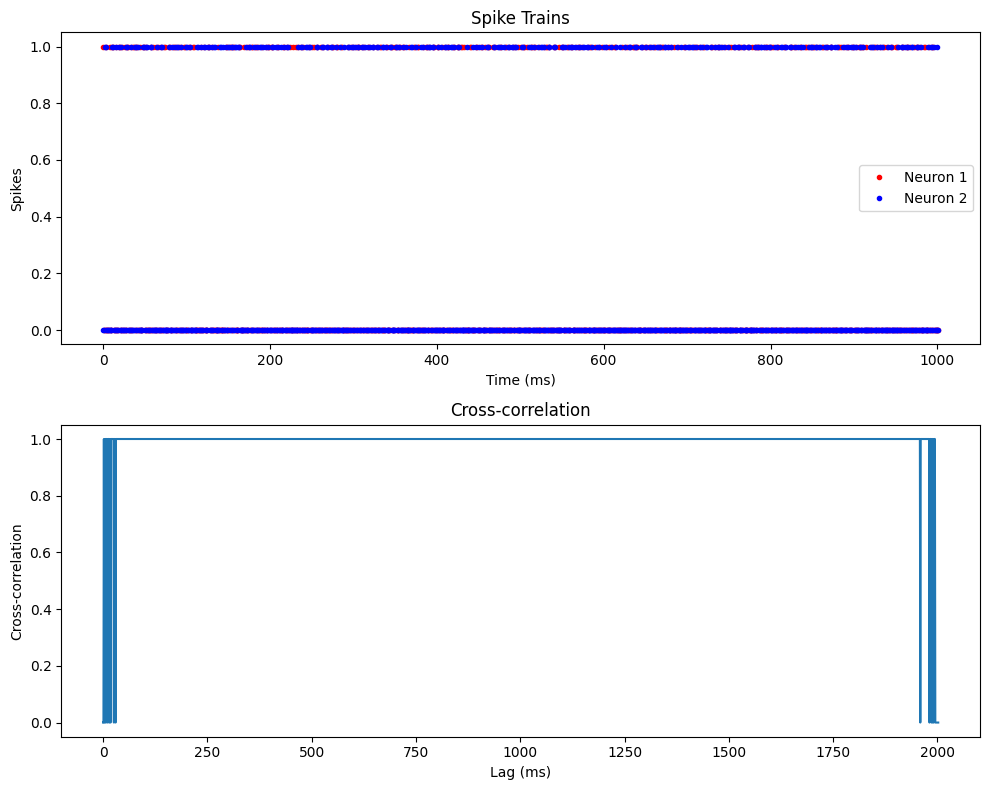